In [1]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = sp.sin(t)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e3),
                    Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e6),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 0, C = 1e-6),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': sin(t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-06, 'V0': 0}}}

In [4]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [5]:
model = solveTransient(compiled, 10, 1e-2, debugLog = True)

{I3_0: I3_0(t), V1: V1(t), V0: V0(t), I3_1: I3_1(t), I1_0: I1_0(t), I4_0: I4_0(t), V2: V2(t), I1_1: I1_1(t), I2_0: I2_0(t), I0_1: I0_1(t), I2_1: I2_1(t), I0_0: I0_0(t), I4_1: I4_1(t)}
[Eq(I1_1(t) + I2_0(t), 0), Eq(I2_1(t) + I3_0(t) + I4_0(t), 0), Eq(I0_0(t) + I1_0(t), 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': sin(t)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}}, 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-06, 'V0': 0}}}
{'Vg': {'V+': V2(t), 'V-': 0}, 'D1': {'Vp': V2(t), 'Vn': V0(t)}, 'R1': {'V1': V0(t), 'V2': V1(t)}, 'R2': {'V1': V1(t), 'V2': 0}, 'C1': {'V1': V1(t), 'V2': 0}}
{'Vg': {'V+': I0_0(t),

In [6]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]

{'V2': V0, 'Vc': V1, 'V1': V2}


In [7]:
printModel(model, var=t, important={Vin, Vc})

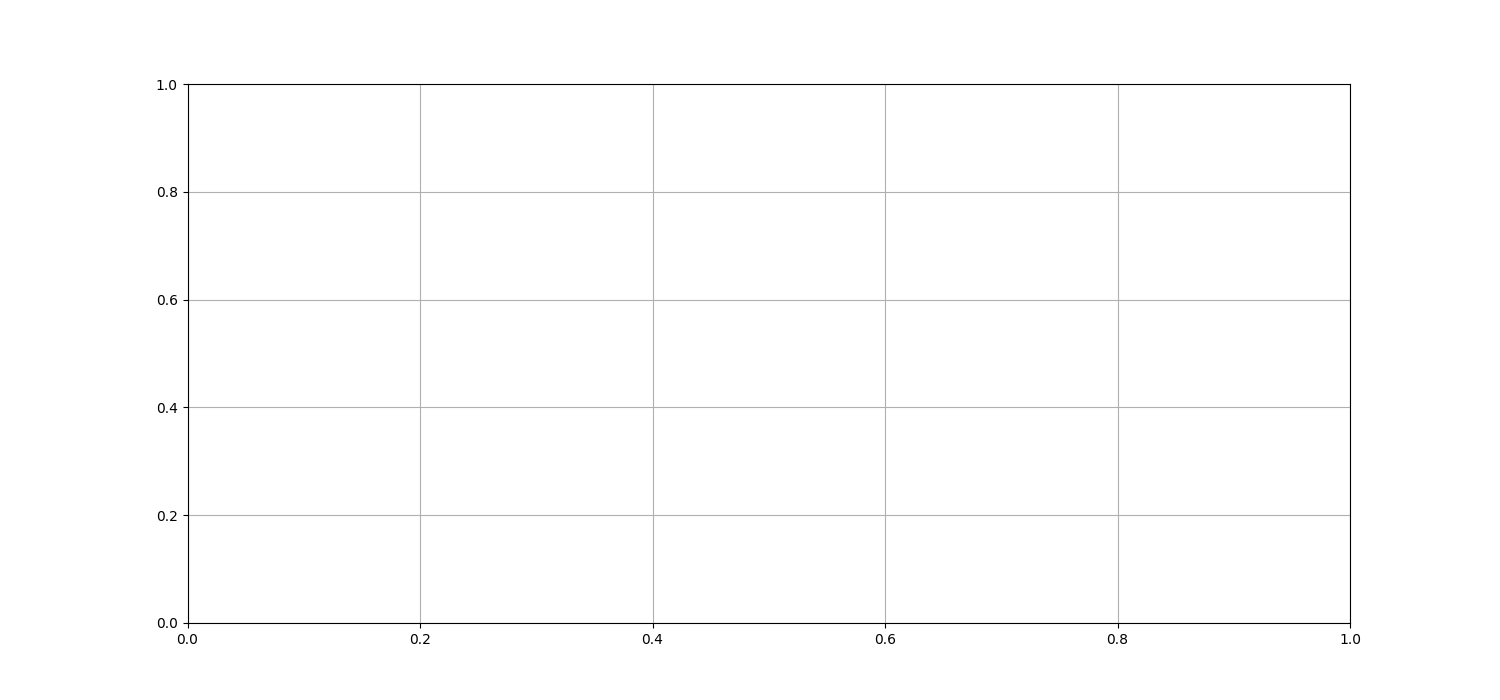

In [8]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    #(1e3 * Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                    (Vc, "Vc(t)"),
                    #(lambda sol : Uc.subs(sol), "Uc"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.1, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()